# Environment Setup

In [3]:
# Check who is the user running Jupyter.
who_am_i = !whoami

# Define our data base path.
base_path_data = '../input' if who_am_i[0] == 'root' else '../../data'

'../../data'

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir(base_path_data))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'gender_submission.csv']


# Data Set Preparation

In [58]:
df_raw = pd.read_csv(base_path_data + '/train.csv', sep=",", header=0)

# Statistics

In [59]:
print(df_raw.describe())
print(df_raw.dtypes)
df_raw.loc[:5,]

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
PassengerId      int64
Survived         int64
Pclass           int64
Name        

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


# Visualization of Data

In [180]:
# Columns to keep.
features = 'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked'.split(',')

# Get rid of the observations for which one of the features has NA as value.
df_raw_no_na = df_raw.dropna(axis=0, subset=features)

# Data Types.
df_raw_no_na.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [179]:
# Check people age under 1.
df_raw_no_na.query('Age < 1')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [165]:
# Group by age and count to see the distribution.
age_2_count = df_raw_no_na.groupby('Age')['PassengerId'].count().reset_index(name="Count")
age_2_count.loc[:5,]

,Age,Count
0,0.42,1
1,0.67,1
2,0.75,2
3,0.83,2
4,0.92,1
5,1.00,7


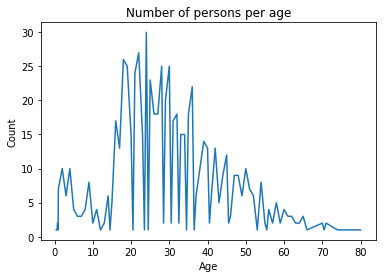

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline

# Use the binary classifier on all data.
Xs = age_2_count.loc[:,'Age']
Ys = age_2_count.loc[:,'Count']
plt.plot(Xs, Ys)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Number of persons per age')
plt.show()

# Classification using Numerical Data

In [ ]:
columns_numeric = 'PassengerId,Survived,Age,Fare'.split(',')